In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import  SVC
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
import qgrid
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from PIPELINE_CLASS import *

### Leer dataset

In [2]:
PATHDATA_MFFC_AVG = '../../../data/audios_MFCC_average_1000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [3]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y=  np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (10787, 20)




In [4]:
FOLDS = 10
TRAIN_SIZE = 0.8


## SVM

## 1. Mejor modelo

Usamos X_train_original y Y_train__original para seleccionar la mejor combinación de parametros y posteriormente validar dichos res]ultados con el conjunto X_test__original y Y_test__original.

<b>Nota:</b> el conjunto X_train_original se divide en dos conjuntos train y dev a una proporción de 80 a 20.

In [5]:
clases =['yes','no','right','five','nine']
PIPELINE= PIPELINE_MULTIPLES_INST(X,Y,groups,tracks,FOLDS,TRAIN_SIZE,clases)

Número de clases: 5
Número de hablantes diferentes 127
Número de audios diferentes 1000
### Info TRAIN
X (8377, 20)
Groups 101
Tracks 776
### Info TEST
X (2410, 20)
Groups 26
Tracks 224


###  Temporal Test

In [6]:
SVMC = SVC(kernel='poly',C=3,degree=3)#Configurar el modelo
model_trained,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(SVMC,label_request=True)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Accuracy:  0.35714285714285715 


classification report :
               precision    recall  f1-score   support

         0.0       0.24      0.42      0.30        43
         1.0       0.46      0.61      0.52        44
         2.0       0.60      0.06      0.11        49
         3.0       0.29      0.49      0.37        41
         4.0       0.75      0.26      0.38        47

    accuracy                           0.36       224
   macro avg       0.47      0.37      0.34       224
weighted avg       0.48      0.36      0.33       224



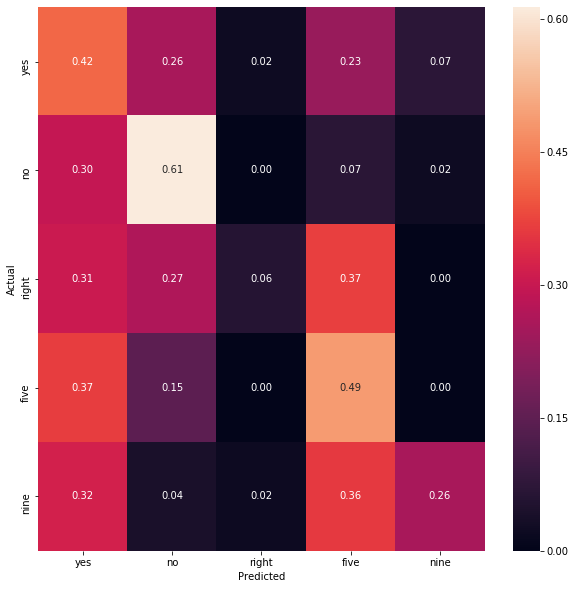

              precision    recall  f1-score   support

         0.0       0.24      0.42      0.30        43
         1.0       0.46      0.61      0.52        44
         2.0       0.60      0.06      0.11        49
         3.0       0.29      0.49      0.37        41
         4.0       0.75      0.26      0.38        47

    accuracy                           0.36       224
   macro avg       0.47      0.37      0.34       224
weighted avg       0.48      0.36      0.33       224



In [7]:
report = PIPELINE.confusion_matrix_Metrics(model_trained)
print(report)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

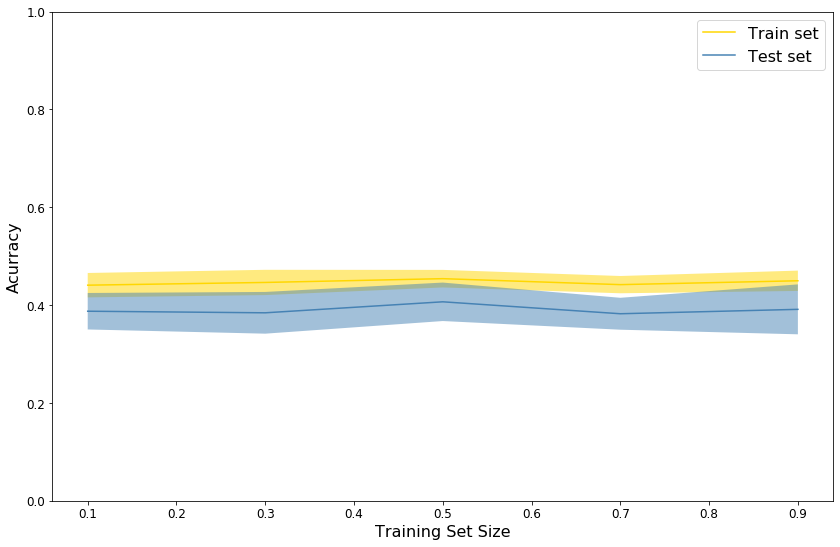

In [8]:
df_split_params = PIPELINE.learning_curve(model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)

# Probamos multiples combinaciones

## KERNEL RBF

In [41]:
df_types = pd.DataFrame({
    'kernel' : pd.Series(['rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'gamma' : pd.Series([1e-1,1e-10,1e-5,1e-1,1e-10,1e-5,1e-1,1e-10,1e-5]),
    'C':pd.Series([1,1,1,2,2,2,3,3,3])
    })

df_types["Eficiencia en train"] = ""
df_types["Intervalo de confianza train"] = ""
df_types["Eficiencia en test"] = ""
df_types["Intervalo de confianza test"] = ""

df_types.set_index(['kernel','gamma','C'], inplace=True)

models_trained_RBF = []
cont = 0
for kernel,gamma,C in df_types.index:
    SVMC = SVC(kernel=str(kernel),gamma=float(gamma),C=int(C))
    model_trained,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(SVMC,label_request=True)
    df_types["Eficiencia en train"][cont] = str(eficiencia_Train)
    df_types["Intervalo de confianza train"][cont] =str(intervalo_Train)
    df_types["Eficiencia en test"][cont]=str(eficiencia_Test)
    df_types["Intervalo de confianza test"][cont]=str(intervalo_Test)
    models_trained_RBF.append(model_trained)
    cont = cont +1
    print("############################################")
    print('kernel',str(kernel),'gamma',float(gamma),'C',int(C))
    print("Efi Train",str(eficiencia_Train))
    print("Std Train",str(intervalo_Train))
    print("Efi Test",str(eficiencia_Test))
    print("Std Test",str(intervalo_Test))

df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 0.1 C 1
Efi Train 0.9912391814898228
Std Train 0.003193878320065587
Efi Test 0.1811529594100198
Std Test 0.010613909973085794


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 1e-10 C 1
Efi Train 0.20945624384637945
Std Train 0.0042528209316895545
Efi Test 0.1886306729980119
Std Test 0.01158109462224397


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 1e-05 C 1
Efi Train 0.38556661743259746
Std Train 0.015496925068930708
Efi Test 0.3341006683897117
Std Test 0.03425569342587378


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 0.1 C 2
Efi Train 0.9968163084787983
Std Train 0.003211794516879072
Efi Test 0.17524491898875896
Std Test 0.01545348761103216


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 1e-10 C 2
Efi Train 0.2108266707238433
Std Train 0.004223523984399296
Efi Test 0.18524853812187947
Std Test 0.015573588099246279


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 1e-05 C 2
Efi Train 0.44530647935318235
Std Train 0.03512441399152201
Efi Test 0.35463649139849523
Std Test 0.03557563666051353


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 0.1 C 3
Efi Train 0.9950398687656863
Std Train 0.0023988336180656125
Efi Test 0.1842254965900363
Std Test 0.01584353301203128


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 1e-10 C 3
Efi Train 0.2095939464244462
Std Train 0.0038438666420508674
Efi Test 0.18749033077063113
Std Test 0.008526181209039052


/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

############################################
kernel rbf gamma 1e-05 C 3
Efi Train 0.45731261869941464
Std Train 0.03535409088777843
Efi Test 0.35398672820591537
Std Test 0.037382665614085174


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [42]:
qgrid_widget.get_changed_df()

Eficiencia en train Intervalo de confianza train  \
kernel gamma        C                                                     
rbf    1.000000e-10 1  0.20945624384637945        0.0042528209316895545   
                    2   0.2108266707238433         0.004223523984399296   
                    3   0.2095939464244462        0.0038438666420508674   
       1.000000e-05 1  0.38556661743259746         0.015496925068930708   
                    2  0.44530647935318235          0.03512441399152201   
                    3  0.45731261869941464          0.03535409088777843   
       1.000000e-01 1   0.9912391814898228         0.003193878320065587   
                    2   0.9968163084787983         0.003211794516879072   
                    3   0.9950398687656863        0.0023988336180656125   

                        Eficiencia en test Intervalo de confianza test  
kernel gamma        C                                                   
rbf    1.000000e-10 1   0.1886306729980119         0.01158109462224397  
                    2  0.18524853812187947        0.015573588099246279  
                    3  0.18749033077063113        0.008526181209039052  
       1.000000e-05 1   0.3341006683897117         0.03425569342587378  
                    2  0.35463649139849523         0.03557563666051353  
                    3  0.35398672820591537        0.037382665614085174  
       1.000000e-01 1   0.1811529594100198        0.010613909973085794  
                    2  0.17524491898875896         0.01545348761103216  
                    3   0.1842254965900363         0.01584353301203128

## KERNEL LINEA

In [ ]:
df_types = pd.DataFrame({
    'kernel' : pd.Series(['linear','linear','linear']),
    'C':pd.Series([1,2,3])
    })

df_types["Eficiencia en train"] = ""
df_types["Intervalo de confianza train"] = ""
df_types["Eficiencia en test"] = ""
df_types["Intervalo de confianza test"] = ""

df_types.set_index(['kernel','C'], inplace=True)

models_trained_LINEA = []
cont = 0
for kernel,C in df_types.index:
    SVMC = SVC(kernel=str(kernel),C=int(C))
    model_trained,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(SVMC,label_request=True)
    df_types["Eficiencia en train"][cont] = str(eficiencia_Train)
    df_types["Intervalo de confianza train"][cont] =str(intervalo_Train)
    df_types["Eficiencia en test"][cont]=str(eficiencia_Test)
    df_types["Intervalo de confianza test"][cont]=str(intervalo_Test)
    models_trained_LINEA.append(model_trained)
    cont = cont +1
    print("############################################")
    print('kernel',str(kernel),'C',int(C))
    print("Efi Train",str(eficiencia_Train))
    print("Std Train",str(intervalo_Train))
    print("Efi Test",str(eficiencia_Test))
    print("Std Test",str(intervalo_Test))
    
df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
qgrid_widget.get_changed_df()

## KERNEL POLY

In [ ]:
df_types = pd.DataFrame({
    'kernel' : pd.Series(['poly','poly','poly','poly','poly','poly','poly','poly','poly']),
    'C':pd.Series([1,1,1,2,2,2,3,3,3]),
    'degree':pd.Series([1,2,3,1,2,3,1,2,3])
    })

df_types["Eficiencia en train"] = ""
df_types["Intervalo de confianza train"] = ""
df_types["Eficiencia en test"] = ""
df_types["Intervalo de confianza test"] = ""

df_types.set_index(['kernel','C','degree'], inplace=True)

models_trained_POLY = []
cont = 0
for kernel,C,degree in df_types.index:
    SVMC = SVC(kernel=str(kernel),C=int(C),degree=int(degree))
    model_trained,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(SVMC,label_request=True)
    df_types["Eficiencia en train"][cont] = str(eficiencia_Train)
    df_types["Intervalo de confianza train"][cont] =str(intervalo_Train)
    df_types["Eficiencia en test"][cont]=str(eficiencia_Test)
    df_types["Intervalo de confianza test"][cont]=str(intervalo_Test)
    models_trained_POLY.append(model_trained)
    cont = cont +1
    print("############################################")
    print('kernel',str(kernel),'degree',float(degree),'C',int(C))
    print("Efi Train",str(eficiencia_Train))
    print("Std Train",str(intervalo_Train))
    print("Efi Test",str(eficiencia_Test))
    print("Std Test",str(intervalo_Test))

df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

In [ ]:
qgrid_widget.get_changed_df()

### La mejor combinación de parametros

In [ ]:
models_trained_RBF
models_trained_LINEA
models_trained_POLY

In [ ]:
best_model_trained = model_trained[<index_mejor_modelo>]

## 2. Evalución mejor modelo con el conjunto de test

In [ ]:
report = PIPELINE.confusion_matrix_Metrics(best_model_trained)
print(report)

## Learning Curve

In [ ]:
df_split_params = PIPELINE.learning_curve(best_model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)